In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Exploratory Data Analysis

In [22]:
data = pd.read_csv('/Users/sarimkazmi/Desktop/diabetes_prediction_dataset.csv')

In [23]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [24]:
data.tail()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0
99999,Female,57.0,0,0,current,22.43,6.6,90,0


In [25]:
data.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [26]:
data.shape

(100000, 9)

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


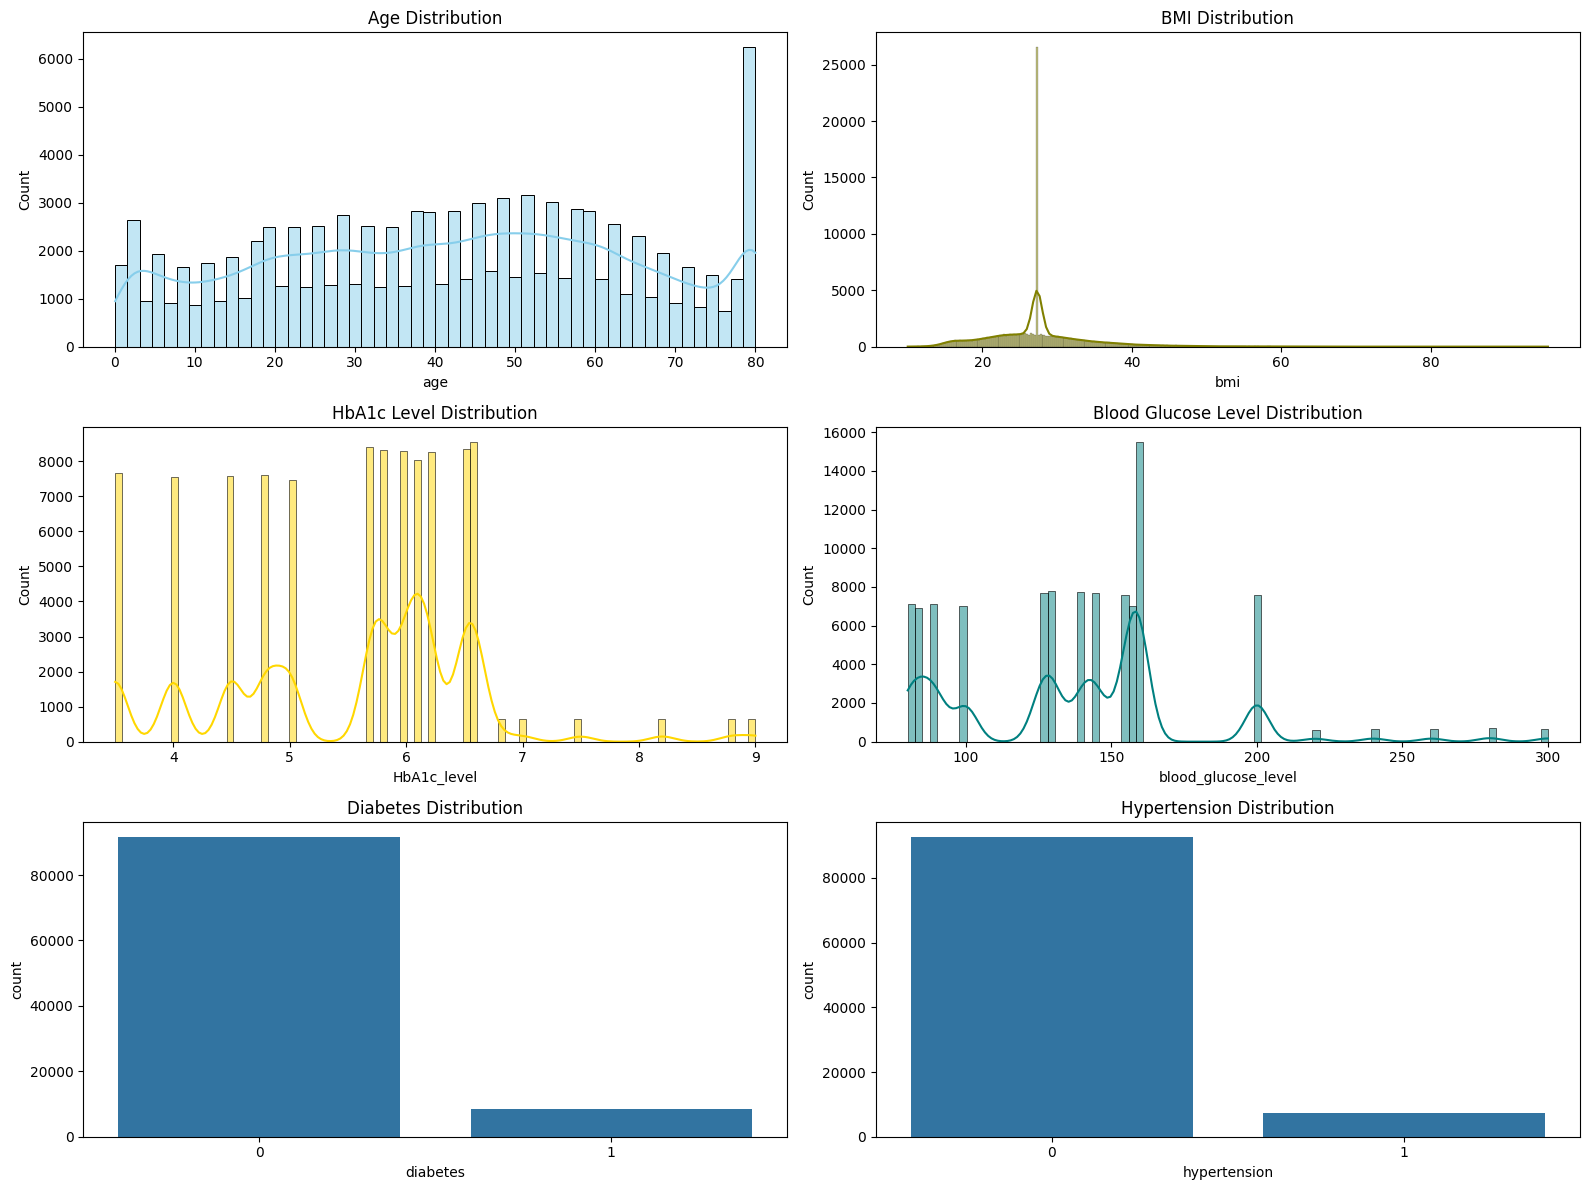

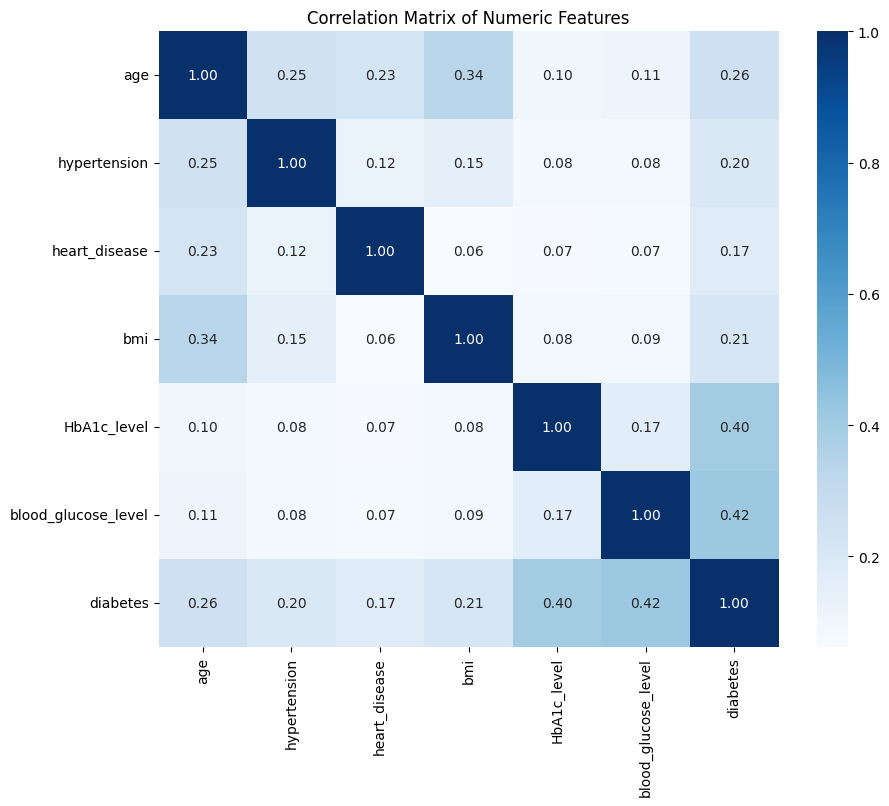

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

df = data
missing_values = df.isnull().sum()
numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()

fig, axs = plt.subplots(3, 2, figsize=(16, 12))
sns.histplot(data=df, x="age", kde=True, ax=axs[0, 0], color='skyblue').set(title='Age Distribution')
sns.histplot(data=df, x="bmi", kde=True, ax=axs[0, 1], color='olive').set(title='BMI Distribution')
sns.histplot(data=df, x="HbA1c_level", kde=True, ax=axs[1, 0], color='gold').set(title='HbA1c Level Distribution')
sns.histplot(data=df, x="blood_glucose_level", kde=True, ax=axs[1, 1], color='teal').set(title='Blood Glucose Level Distribution')
sns.countplot(data=df, x="diabetes", ax=axs[2, 0]).set(title='Diabetes Distribution')
sns.countplot(data=df, x="hypertension", ax=axs[2, 1]).set(title='Hypertension Distribution')

plt.tight_layout()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='Blues')
plt.title('Correlation Matrix of Numeric Features')

plt.show()
missing_values

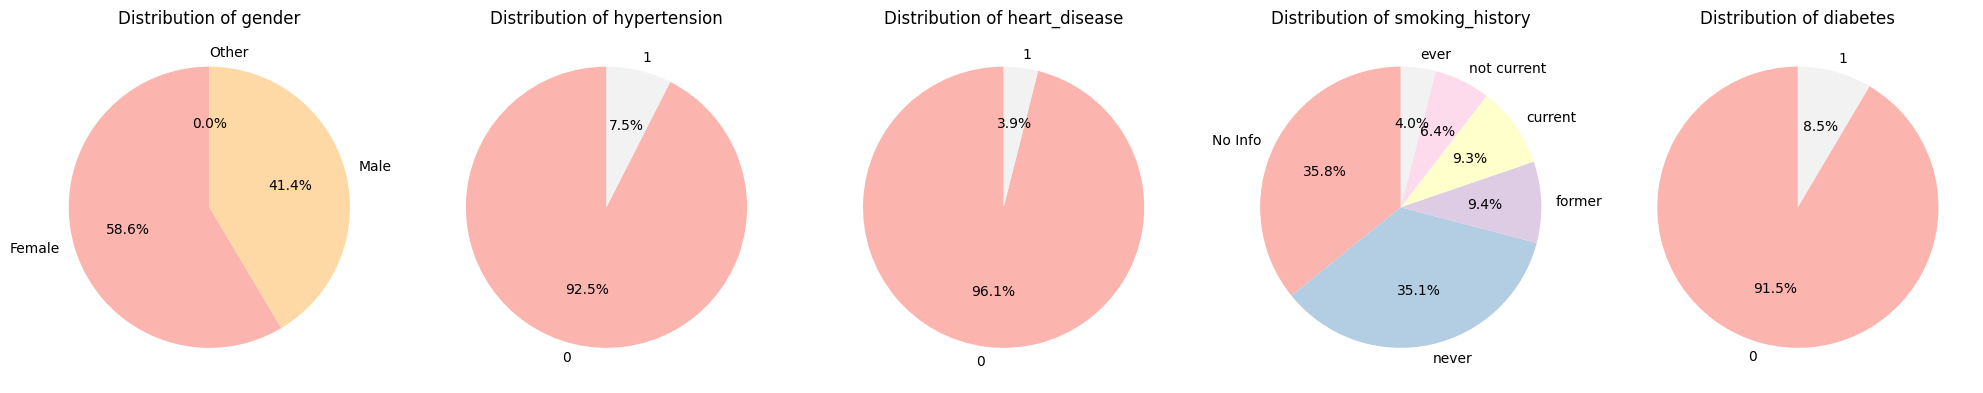

In [29]:
import matplotlib.pyplot as plt

# Function to plot pie charts for given columns
def plot_pie_charts(data, columns):
    fig, axes = plt.subplots(1, len(columns), figsize=(20, 5))
    for ax, column in zip(axes, columns):
        data[column].value_counts().plot.pie(autopct='%1.1f%%', ax=ax, startangle=90, cmap='Pastel1')
        ax.set_ylabel('')
        ax.set_title(f'Distribution of {column}')
    plt.tight_layout()
    plt.show()

# Columns to create pie charts for
columns = ['gender', 'hypertension', 'heart_disease', 'smoking_history', 'diabetes']
plot_pie_charts(data, columns)

# Model Building

In [30]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and testing sets by allocating 80% of data for training and 20% for testing
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

train_file_path = '/Users/sarimkazmi/Desktop/training_dataset.csv'
test_file_path = '/Users/sarimkazmi/Desktop/testing_dataset.csv'
#Saving the datasets to new CSV files
train_set.to_csv(train_file_path, index=False)
test_set.to_csv(test_file_path, index=False)

(train_file_path, test_file_path)

('/Users/sarimkazmi/Desktop/training_dataset.csv',
 '/Users/sarimkazmi/Desktop/testing_dataset.csv')

In [31]:
train_file_path = '/Users/sarimkazmi/Desktop/training_dataset.csv'
new_train_dataset = pd.read_csv(train_file_path)

# Preparing the dataset again
# Splitting features and target
X_new_train = new_train_dataset.drop('diabetes', axis=1)
y_new_train = new_train_dataset['diabetes']

# Handling categorical variables via one-hot encoding
X_new_train_encoded = pd.get_dummies(X_new_train, drop_first=True)

# Re-initialize and train the Random Forest classifier
new_rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
new_rf_classifier.fit(X_new_train_encoded, y_new_train)


RandomForestClassifier(random_state=42)

In [32]:
from joblib import dump

model_filename = '/Users/sarimkazmi/Desktop/model.joblib'
dump(new_rf_classifier, model_filename)

['/Users/sarimkazmi/Desktop/model.joblib']

In [33]:
X_new_train_encoded.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,gender_Male,gender_Other,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,73.0,0,0,24.77,3.5,80,True,False,False,False,True,False,False
1,80.0,0,0,24.60,5.7,145,True,False,False,False,False,True,False
2,38.0,0,0,24.33,4.0,158,False,False,False,True,False,False,False
3,26.0,0,0,18.87,5.0,100,False,False,False,False,False,False,True
4,61.0,1,0,22.11,4.5,85,False,False,True,False,False,False,False


In [34]:
from sklearn.metrics import accuracy_score, classification_report
test_file_path = '/Users/sarimkazmi/Desktop/testing_dataset.csv'
test_dataset = pd.read_csv(test_file_path)

X_test = test_dataset.drop('diabetes', axis=1)
y_test = test_dataset['diabetes']
X_test_encoded = pd.get_dummies(X_test, drop_first=True)

# Align the test dataset features with the trained model's features
X_test_aligned = X_test_encoded.reindex(columns = X_new_train_encoded.columns, fill_value=0)

# Using the above Random Forest model to predict on the testing dataset
y_pred = new_rf_classifier.predict(X_test_aligned)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
accuracy_report = classification_report(y_test, y_pred)

print(accuracy*100, accuracy_report)

96.99               precision    recall  f1-score   support

           0       0.97      1.00      0.98     18292
           1       0.95      0.69      0.80      1708

    accuracy                           0.97     20000
   macro avg       0.96      0.84      0.89     20000
weighted avg       0.97      0.97      0.97     20000



In [35]:
X_test_aligned.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,gender_Male,gender_Other,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,13.0,0,0,20.82,5.8,126,False,False,False,False,False,False,False
1,3.0,0,0,21.00,5.0,145,False,False,False,False,False,False,False
2,63.0,0,0,25.32,3.5,200,True,False,False,False,True,False,False
3,2.0,0,0,17.43,6.1,126,False,False,False,False,False,True,False
4,33.0,0,0,40.08,6.2,200,False,False,False,False,False,False,True


# Saving the model

In [36]:
predict_file_path = '/Users/sarimkazmi/Desktop/testing_dataset.csv'
predict_dataset = pd.read_csv(predict_file_path)

X_predict = predict_dataset.drop('diabetes', axis=1)
X_predict_encoded = pd.get_dummies(X_predict, drop_first=True)

# Align the features of the dataset to match the trained model
X_predict_aligned = X_predict_encoded.reindex(columns = X_new_train_encoded.columns, fill_value=0)

# Predict the diabetes status using the trained Random Forest model
predicted_diabetes_status = new_rf_classifier.predict(X_predict_aligned)

predict_dataset['Predicted_Diabetes_Status'] = predicted_diabetes_status
predict_dataset['Predicted_Diabetes_Status'] = predict_dataset['Predicted_Diabetes_Status'].map({0: 'Not Diabetic', 1: 'Diabetic'})

print(predict_dataset.head(10))
print(predict_dataset.tail(10))

   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  13.0             0              0         No Info  20.82   
1  Female   3.0             0              0         No Info  21.00   
2    Male  63.0             0              0          former  25.32   
3  Female   2.0             0              0           never  17.43   
4  Female  33.0             0              0     not current  40.08   
5  Female  70.0             0              0           never  23.89   
6  Female  51.0             0              0         current  27.32   
7  Female  12.0             0              0         No Info  27.32   
8  Female  45.0             0              0         No Info  27.32   
9  Female  19.0             0              0          former  27.32   

   HbA1c_level  blood_glucose_level  diabetes Predicted_Diabetes_Status  
0          5.8                  126         0              Not Diabetic  
1          5.0                  145         0              Not Diabeti

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Load the dataset
file_path = '/Users/sarimkazmi/Desktop/training_dataset.csv' # Update this path to your dataset's actual path
dataset = pd.read_csv(file_path)

# Preprocess the dataset
# Assuming 'diabetes' is the target variable and the rest are features
X = dataset.drop('diabetes', axis=1)
y = dataset['diabetes']

categorical_features = ['gender', 'smoking_history']
preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(), categorical_features)],
    remainder='passthrough')

X_encoded = preprocessor.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest classifier with custom parameters
rf_classifier_custom = RandomForestClassifier(
    n_estimators=150,  # More trees than the default
    max_depth=10,  # Limiting depth of tree to prevent overfitting
    min_samples_split=5,  # Minimum number of samples required to split an internal node
    min_samples_leaf=4,  # Minimum number of samples required to be at a leaf node
    random_state=42
)
rf_classifier_custom.fit(X_train, y_train)

# Predict on the testing set
y_pred = rf_classifier_custom.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
accuracy_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy*100)
print("Classification Report:", accuracy_report)

Accuracy: 97.08125
Classification Report:               precision    recall  f1-score   support

           0       0.97      1.00      0.98     14619
           1       1.00      0.66      0.80      1381

    accuracy                           0.97     16000
   macro avg       0.98      0.83      0.89     16000
weighted avg       0.97      0.97      0.97     16000



In [38]:
print("Accuracy:", accuracy*100)

Accuracy: 97.08125


# Accuracy Matrix

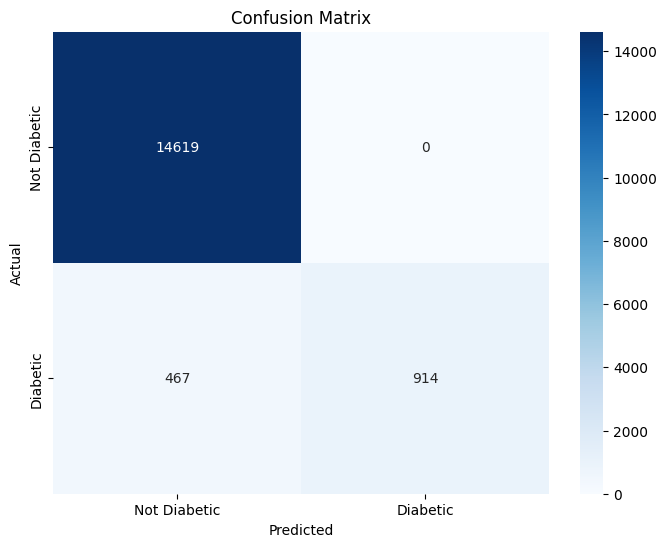

In [39]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test is your true labels and y_pred is the predictions from the Random Forest model
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['Not Diabetic', 'Diabetic'], yticklabels=['Not Diabetic', 'Diabetic'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Accuracy Graph

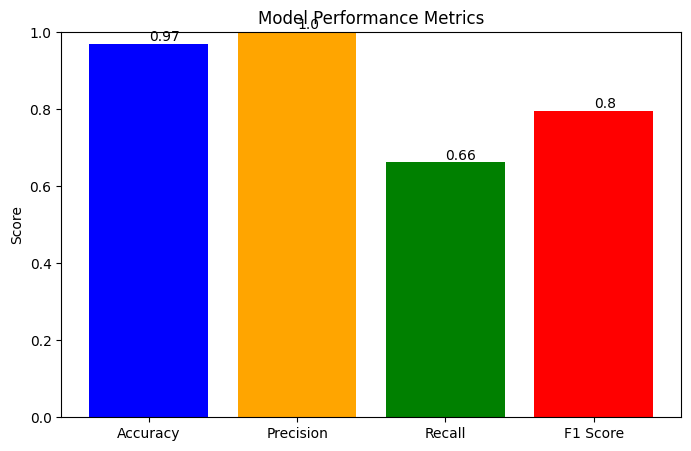

In [40]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import numpy as np

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Metrics to plot
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]

fig, ax = plt.subplots(figsize=(8, 5))
bars = plt.bar(metrics, values, color=['blue', 'orange', 'green', 'red'])

# Adding value labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, round(yval, 2), va='bottom') # va: vertical alignment

plt.ylim(0, 1) # Assuming all metrics are between 0 and 1
plt.ylabel('Score')
plt.title('Model Performance Metrics')
plt.show()